In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
!pip install -qq  autodistill
!pip install -qq  autodistill-grounded-sam
!pip install -qq  roboflow
!pip install -qq  supervision==0.9.0
!pip install -qq git+https://github.com/pytube/pytube

In [16]:
import supervision as sv
from tqdm.notebook import tqdm
import cv2
import subprocess
import os
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM

In [26]:
IMAGE_DIR_PATH = "/kaggle/input/augdata1/VLGProject/Augmented/DarkChocolate"

In [27]:
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "JPG"])

print('image count:', len(image_paths))

image count: 736


In [19]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

In [29]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
   "deep dark brown color":"chocolate",
   "dark brown liquid texture":"chocolate",
   "creamy white solid " : "chocolate",
   "dark brown liquid texture":"chocolate"
})

In [30]:
DATASET_DIR_PATH = "/kaggle/working/VLGProject/Augmented/DarkChocolate"

In [31]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".png",
    output_folder=DATASET_DIR_PATH,
    record_confidence = True,
    )

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /kaggle/input/augdata1/VLGProject/Augmented/DarkChocolate/augmented_0_7330.png: 100%|██████████| 736/736 [47:21<00:00,  3.86s/it]


Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_9066.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_3997.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_6899.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_1521.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_9001.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_4507.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_9276.txt
Saved confidence file: /kaggle/working/VLGProject/Augmented/DarkChocolate/annotations/confidence-augmented_0_938.txt
Saved confidence file: /kaggle/working/VLGProject/Augment

In [32]:
ANNOTATIONS_DIRECTORY_PATH = "/kaggle/working/VLGProject/Augmented/DarkChocolate/train/labels"
IMAGES_DIRECTORY_PATH = "/kaggle/working/VLGProject/Augmented/DarkChocolate/train/images"
DATA_YAML_PATH = "/kaggle/working/VLGProject/Augmented/DarkChocolate/data.yaml"

In [33]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

588

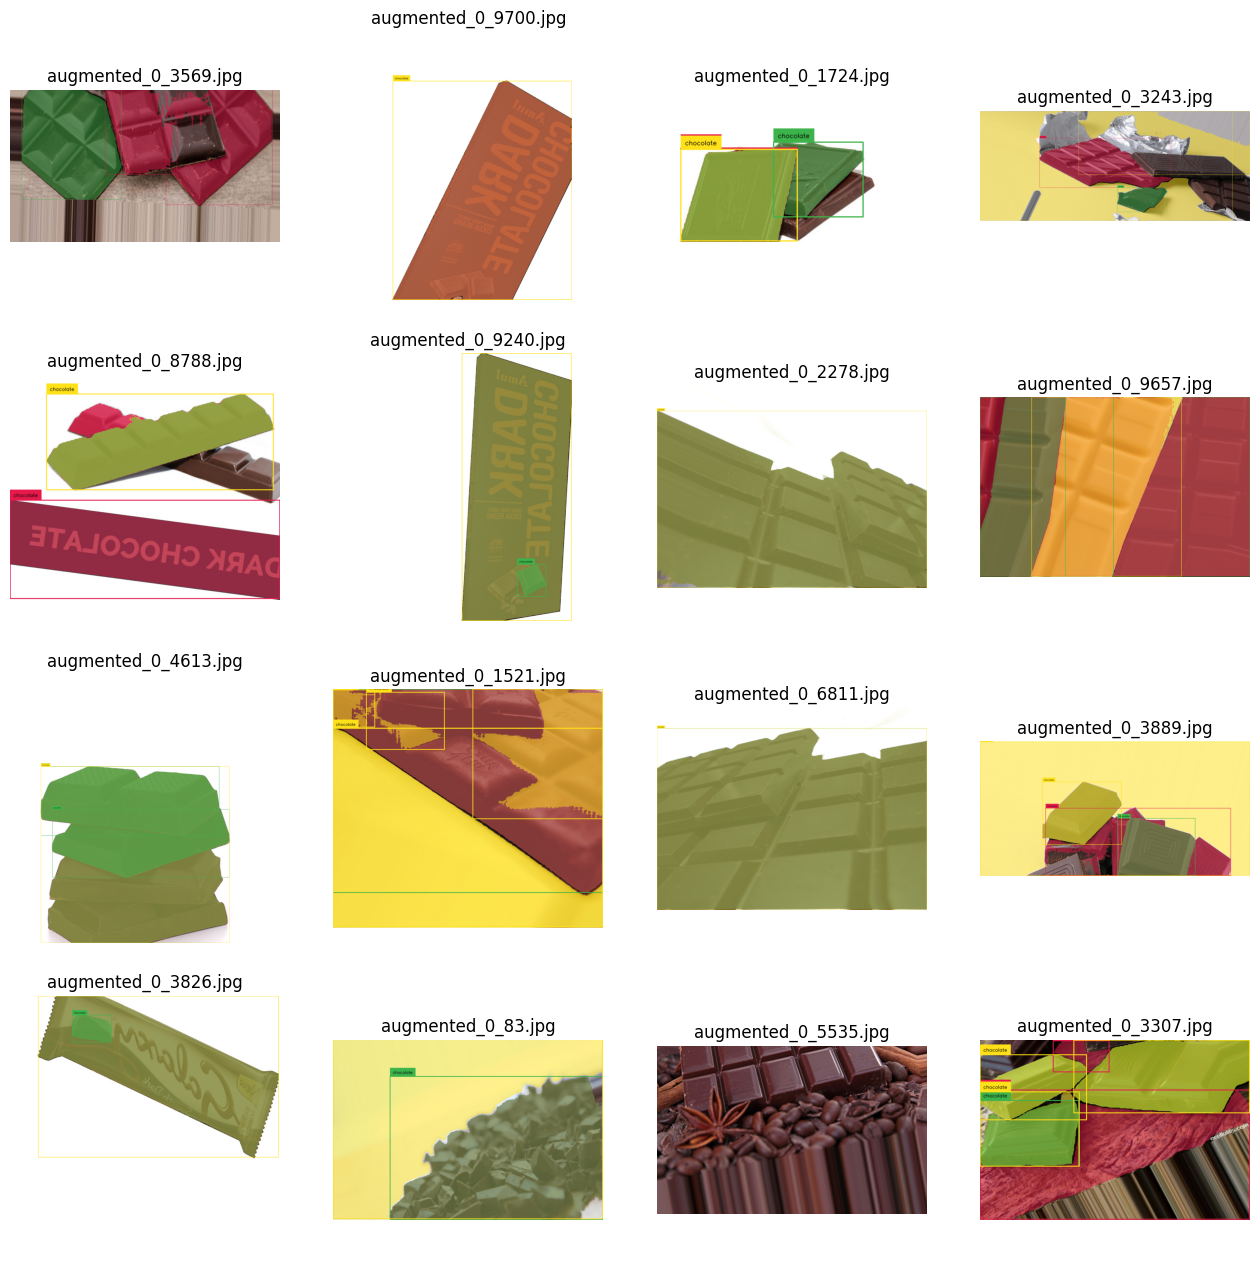

In [34]:
import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)